### Kelompok 2

In [171]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

In [172]:
t = np.linspace (-10, 10, 100)
delta_t = 0.03906	

def f(t):
    return np.sin (t)

def dt(t):
    return np.cos (t)

def dt_2(t):
    return -np.sin (t)

##### 1st Finite Difference Approximate

In [173]:
F_dif = (-2*f(t + delta_t) + f(t) + f(t + 2*delta_t))/delta_t**2
B_dif = (f(t) - 2*f(t - delta_t) + f(t - 2*delta_t))/delta_t**2
C_dif = (f(t[1:98] + delta_t) + f(t[1:98] - delta_t) - 2*f(t[1:98]))/(delta_t**2)

##### Richardson 

In [174]:
def F_dif_2nd (x, delta_t):
    return ((-3*f(x)) + (4*f(x+delta_t)) - f(x+(2*delta_t)))/(2*delta_t)

In [175]:
p = 2
#h = 0.2
G = (2**p * F_dif_2nd(t, delta_t/2) - F_dif_2nd(t, delta_t))/(2**p - 1)

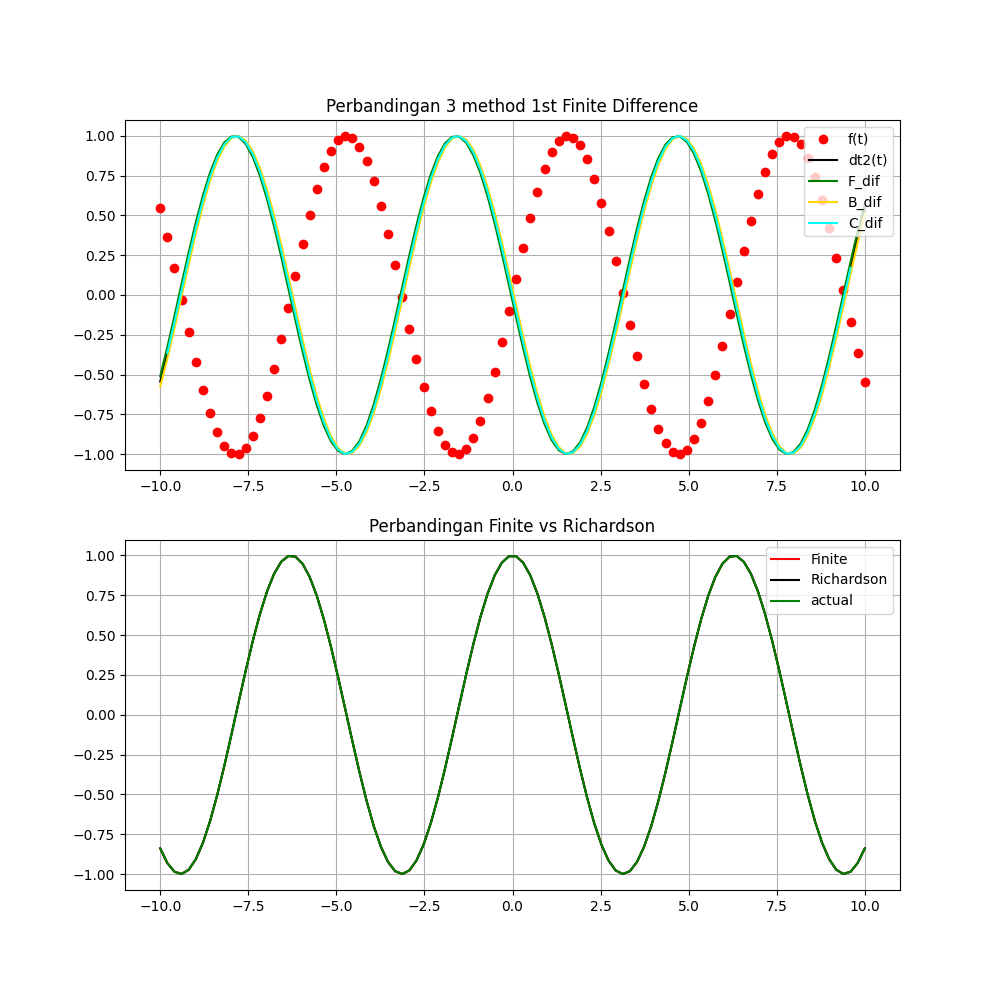

In [176]:
fig, ax = plt.subplots (2, figsize = (10, 10))

ax[0].plot (t, f(t), 'or', label="f(t)")
ax[0].plot (t, dt_2(t), '-', color="black", label="dt2(t)")
ax[0].plot (t, F_dif, '-', color="green", label="F_dif")
ax[0].plot (t, B_dif, '-', color="gold", label="B_dif")
ax[0].plot (t[1:98], C_dif, '-', color="cyan", label="C_dif")

ax[0].legend (loc='best')
ax[0].grid ()

ax[1].plot (t, F_dif_2nd (t, delta_t), '-', color="red", label="Finite")
ax[1].plot (t, G, '-', color="black", label="Richardson")
ax[1].plot (t, dt (t), '-', color="green", label="actual")

ax[1].legend (loc='best')
ax[1].grid ()

ax[0].set_title ("Perbandingan 3 method 1st Finite Difference")
ax[1].set_title ("Perbandingan Finite vs Richardson")
plt.show ()

##### Tabel mencari nilai delta t yang optimal 

In [177]:
def C_dif_tes_6 (h, t=1):
    hasil = round((round(f(t + h),6) - 2* round(f(t),6) + round(f(t - h),6))/round((h**2),6),6)
    return hasil
def C_dif_tes_8 (h, t=1):
    hasil = round((round(f(t + h),8) - 2* round(f(t),8) + round(f(t - h),8))/round((h**2),8),8)
    return hasil

In [178]:
print (f"{dt_2(1)}")

-0.8414709848078965


##### Tabel 6 digit dan 8 digit presisi

In [179]:
print(f"h\t| six digit\t| eight digit")
h = 5
while h >= 0.00124:
    print(f"{h:.5f}\t| {C_dif_tes_6 (h)}\t| {C_dif_tes_8 (h)}")
    h = h/2

h	| six digit	| eight digit
5.00000	| -0.048222	| -0.0482222
2.50000	| -0.484995	| -0.48499523
1.25000	| -0.737455	| -0.73745454
0.62500	| -0.814433	| -0.81443351
0.31250	| -0.834644	| -0.8346452
0.15625	| -0.839764	| -0.83976037
0.07812	| -0.840924	| -0.84104091
0.03906	| -0.841415	| -0.84135712
0.01953	| -0.84252	| -0.84142921
0.00977	| -0.842105	| -0.84135472
0.00488	| -0.833333	| -0.84102349
0.00244	| -0.833333	| -0.84060403
